# Logistic Regression
Title: Student credit default <br>
Relevant Information: Fictious <br>
Number of Instances: 10000 <br>
Number of Attributes: 2 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute,1 categorical <br>
Attribute Information:<br>
Default-Binary variable indicating whether the credit card holder defaulted on their credit card obligations <br>
Student-Categorical variable indicating whether the credit card holder is a student <br>
Balance-Continuous variable recording the credit card holders current outstanding balance <br>
Income-Continuous variable representing the total annual income for the credit card holder <br>
<br>
Part I: Exploration
1) Read in Default.csv and convert all data to numeric <br>
2) Split the data into train and test sets <br>
3) Create a histogram of all variables <br>
4) Create a scatter plot of the income vs. balance <br>
5) Mark defaults with a different color (and symbol) <br>
6) What can you infer from this plot? <br>

<br>
1)Run a logistic regression on the balance variable <br>
    •Use the training set <br>
2)Is the value associated with balance significant? <br>
3)Predict the probability of default for someone with a balance of dollars 1.2k , 2.5k <br>
4)Plot the fitted logistic function overtop of the data points <br>
5)Create predictions using the test set  <br>
6)Compute the overall accuracy, the sensitivity and specificity <br>

In [1]:
import os
import math
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

% matplotlib inline 
 

In [50]:
load_app_config()
DIRECTORY="student"
FILENAME ='student_default.csv'
PREDICTOR="default"
input_path = get_datafolder_path()

{'PRD': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'REG': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'UAT': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'DEV': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}}
Adding F:\MachineLearning  to system path
Adding F:\DataSource  to system path


In [51]:
def prepare_dataset(filename=FILENAME,predictor=PREDICTOR):
    input_file = os.path.join(input_path, DIRECTORY, filename)
    input_dataset = load_data(input_file)
    print(" input file is :{0} loaded.".format(input_file))
    #print(input_dataset.head())
    
    try:
        continuous_vars = input_dataset.describe().columns
        print("Continous Variables")
        print(continuous_vars)
    except ValueError:
        print("No continous variables")
    
    try:
        categorical_vars = input_dataset.describe(include=["object"]).columns
        print("Categorical Variables")
        print(categorical_vars)
    except ValueError:
        print("No categorical variables")
        categorical_vars = None
    
    predictor_column =  [col for col in input_dataset.columns if predictor in col]
    feature_columns =  [col for col in input_dataset.columns if predictor not in col]
    
    print(predictor_column)
    print(feature_columns)
    print(input_dataset.head())
    
    transform_dataset = transform_data(input_dataset,predictor_column,categorical_vars)
    print(transform_dataset.info())
    
    plot_dataset(transform_dataset)
    
    X = transform_dataset[feature_columns]
    y = transform_dataset[predictor_column]
    
    
    
    train_x, test_x, train_y, test_y =split_dataset(X,y,ptest_size=0.3, prandom_state=1)
    return train_x, test_x, train_y, test_y 

In [52]:
def transform_data(input_dataset,predictor_column,categorical_vars):
    transform_dataset =input_dataset
    class_lb = LabelBinarizer()
    
    if categorical_vars is None:
        return transform_dataset
    
    student_bin = class_lb.fit_transform(input_dataset['student'].values) 
    transform_dataset['student']=student_bin
    
    
    return transform_dataset

In [53]:
def plot_dataset(transform_dataset):
    fig = plt.figure(figsize=(16,16))
    for i,column in enumerate(transform_dataset.columns):
        ax =fig.add_subplot(6, 3, i + 1)
        ax.hist(transform_dataset.iloc[:,i])
        ax.set_title("histogram {0}".format(column))
    plt.tight_layout()
    plt.show()
    
    plt.style.use('classic')
    
    nondefault_dataset = transform_dataset[transform_dataset["default"] == 0]
    default_dataset = transform_dataset[transform_dataset["default"] == 1]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(y=nondefault_dataset["income"], x=nondefault_dataset["balance"],alpha = .5, marker='+', c= 'b')
    ax.scatter(y=default_dataset["income"], x=default_dataset["balance"], marker='o', edgecolors = 'r', facecolors = 'none')
    ax.set_title('Scatter Plot {0} vs {1}'.format('income','balance'))
    ax.set_ylabel('income')
    ax.set_xlabel('balance')
    ax.set_xlim(0,2800)
    ax.set_ylim(0,80000)
    ax.grid(True)
    ax.legend( ('default', 'no default'), loc='upper right')
    fig.tight_layout(pad=1)
    plt.show()
    

 input file is :F:\DataSource\student\student_default.csv loaded.
Continous Variables
Index(['default', 'balance', 'income'], dtype='object')
Categorical Variables
Index(['student'], dtype='object')
['default']
['student', 'balance', 'income']
   default student      balance       income
0        0      No   729.526495  44361.62507
1        0     Yes   817.180407  12106.13470
2        0      No  1073.549164  31767.13895
3        0      No   529.250605  35704.49394
4        0      No   785.655883  38463.49588
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null int64
student    10000 non-null int32
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 273.5 KB
None


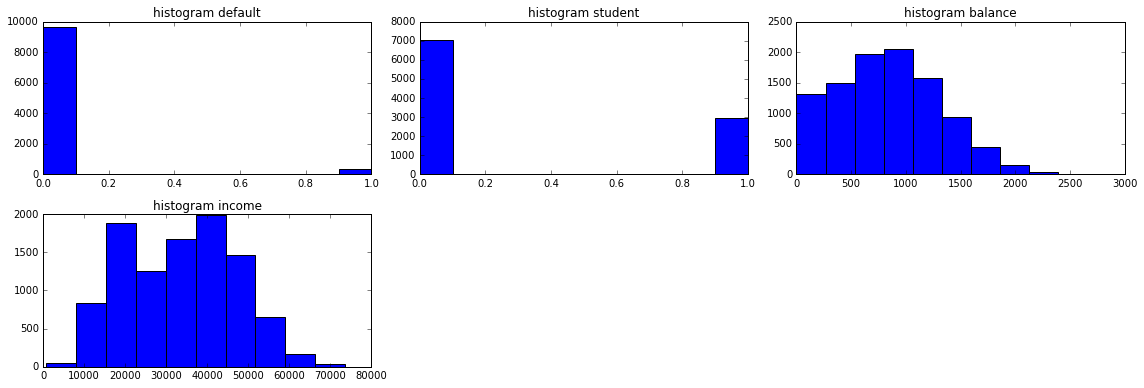

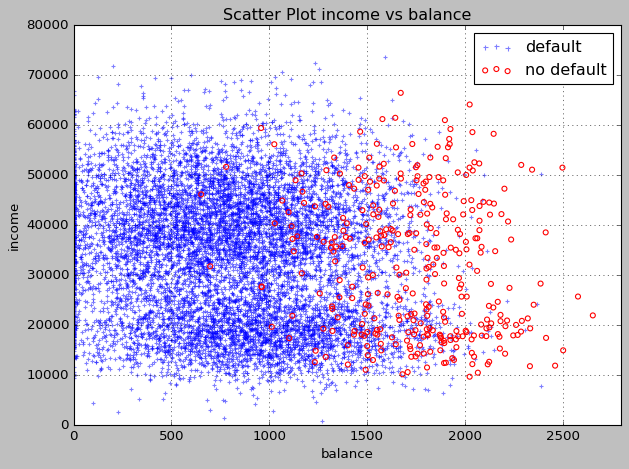

In [54]:
train_x, test_x, train_y, test_y= prepare_dataset(FILENAME,PREDICTOR)


In [55]:
print("It appears that individuals who defaulted tended to have higher credit card balances than those who did not")

It appears that individuals who defaulted tended to have higher credit card balances than those who did not


In [56]:
#train_x, test_x, train_y, test_y
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

train_x = pd.DataFrame(data=train_x, columns=['balance','student','income'])
train_x['default'] = train_y

test_x = pd.DataFrame(data=test_x, columns=['balance','student','income'])
test_x['default'] = test_y

balance = LogisticRegression()
balance.fit(train_x[['balance']].values, train_y.values.ravel())
B1 = balance.coef_[0][0]
B0 = balance.intercept_[0]
np.exp(B1)
prob = balance.predict(pd.DataFrame({'balance': [1200, 2500]}))
print(prob)

[0 1]


In [57]:
train_x = pd.DataFrame(data=train_x, columns=['balance','student','income'])
test_x = pd.DataFrame(data=test_x, columns=['balance','student','income'])
default_lr = LogisticRegression()
default_lr.fit(train_x,train_y.values.ravel())
y_pred =default_lr.predict(test_x)

print(y_pred[0:5])
print(test_y[0:5])

scores   = cross_val_score(default_lr, train_x, train_y.values.ravel(), cv=3)

print('Accuracies: %s' % scores )
print('Mean accuracy: %s' % np.mean(scores))

[0 0 0 0 0]
      default
9953        0
3850        0
4962        0
3886        0
5437        0
Accuracies: [ 0.96401028  0.96529563  0.96483705]
Mean accuracy: 0.96471432078


In [58]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(test_y, y_pred)
print(con_mat)
# Let's define our true posititves, false positives, true negatives, and false negatives
true_neg = con_mat[0][0]
false_neg = con_mat[1][0]
true_pos = con_mat[1][1]
false_pos = con_mat[0][1]

# Sensitivity: percent of correct predictions when reference value is 'default'
sensitivity = float(true_pos)/(false_neg + true_pos)
print(sensitivity)
print(metrics.recall_score(test_y, y_pred))

# Specificity: percent of correct predictions when reference value is 'not default'
specificity = float(true_neg) / (true_neg + false_pos)
print (specificity)

[[2909    0]
 [  91    0]]
0.0
0.0
1.0


In [61]:
def plot_histogram(dataset):
    fig = plt.figure(figsize=(16,16))
    for i,column in enumerate(dataset.columns):
        ax =fig.add_subplot(6, 3, i + 1)
        ax.hist(dataset.iloc[:,i])
        ax.set_title("histogram {0}".format(column))
    plt.tight_layout()
    plt.show()